# Assignment 2: Text Classification with Logistic Regression

This time, we will dive into **text classification** --one of the most popular NLP tasks!

In simple terms, **supervised** text classification is the task of taking a string and assigning it a **label** or a **class**. These labels can be as varied as we can possibly imagine. For example, is a string spam or not? Does it contain hate speech or not? Does it communicate a positive emotion or a negative one? 

As you can see, text classification has many potential applications in this digital age. Given the massive number of strings produced every day, no human is capable of reading and assigning them all a label. Therefore, we want to come up with ways to classify them automatically. This is where **logistic regression (LR)** comes in handy, since it is a **machine learning algorithm** that predicts labels on **unseen inputs**.

In this assignment, we will train a LR model that will help us determine whether a Reddit post contains a "controversial" opinion or not.

*Some of the text in this Assignment is taken from the [book](https://web.stanford.edu/~jurafsky/slp3/5.pdf)*

## Text classification

This NLP task can be subdivided in the following **substasks**: sentiment analysis, spam detection, language identiﬁcation, and authorship attribution.

**Sentiment analysis** classiﬁes a text as reﬂecting the positive or negative orientation (sentiment) that a writer expresses toward some object.

There are many classification algorithms. The most popular ones are naive Bayes, logistic regression, random forests, and suport vector machines. In this assignment we will only make use of logistic regression.

Classiﬁers are **trained** using distinct training, dev, and test sets. Then, they are **evaluated** with various metrics. The most popular ones are  **precision**, **recall**, **accuracy** and **F1 metric**.

Statistical signiﬁcance tests should be used to determine whether we can be conﬁdent that one version of a classiﬁer is better than another.

## Logistic regression (LR)

Logistic regression can be used to classify an observation into one of two classes (like ‘positive sentiment’ and ‘negative sentiment’), or into one of many classes.
  
The main idea behind LR is computing the probability of assigning a document $d$ the probability of having a class $c$. This is, 
$$
P(c \mid d) =P(y \mid x) 
$$

LR (and other probabilistic machine learning classifiers) have the following components:
  1.  A **feature representation** of the input. For each input observation $x^{(i)}$, this will be a vector of features $\left[x_1, x_2, \ldots, x_n\right]$. We will generally refer to feature $i$ for input $x^{(j)}$ as $x_i^{(j)}$, sometimes simplified as $x_i$, but we will also see the notation $f_i, f_i(x)$, or, for multiclass classification, $f_i(c, x)$.
  2.  A **classification function** that computes $\hat{y}$, the estimated class, via $p(y \mid x)$. In the next section we will introduce the **sigmoid** and **softmax** tools for classification.
  3.  An **objective function** for learning, usually involving minimizing error on training examples. We will use the **cross-entropy loss** function.
  4.  An algorithm for **optimizing** the objective function. We will use the **stochastic gradient descent** algorithm.


## 0. Let's look at our data

Before the feature representation step, we need to load our *corpus* and see whats in it.

In [1]:
# this will install Polars in our notebook.
# Polars is a useful data wrangling library.
! pip install polars

# this will install Pytorch, a popular ML framework.
! pip install torch torchvision torchaudio

# numpy is a popular scientific computing library.
! pip install numpy

# tqdm makes your loops show a smart progress meter
# source: https://pypi.org/project/tqdm/
! pip install tqdm

The following block of code will read our *corpus* into memory and print a brief summary of the data contained in it.

In [2]:
import polars as pl

df = pl.read_csv("data.csv")
df.describe()

statistic,comment_id,score,self_text,subreddit,created_time,post_id,author_name,controversiality,ups,downs,user_is_verified,user_account_created_time,user_awardee_karma,user_awarder_karma,user_link_karma,user_comment_karma,user_total_karma,post_score,post_self_text,post_title,post_upvote_ratio,post_thumbs_ups,post_total_awards_received,post_created_time
str,str,f64,str,str,str,str,str,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,str
"""count""","""10000""",10000.0,"""10000""","""10000""","""10000""","""10000""","""10000""",10000.0,10000.0,10000.0,10000.0,"""10000""",10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,"""10000""","""10000""",10000.0,10000.0,10000.0,"""10000"""
"""null_count""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,"""0"""
"""mean""",null,13.6226,null,null,null,null,null,0.5,13.6226,0.0,0.9823,null,828.2566,314.1331,20593.8092,76800.3118,98536.5107,2223.6118,null,null,0.810165,2223.6118,0.0,null
"""std""",null,116.758572,null,null,null,null,null,0.500025,116.758572,0.0,null,null,3522.184763,1818.285791,227349.618559,162506.111621,302778.131495,4348.545872,null,null,0.202442,4348.545872,0.0,null
"""min""","""eeyxlnh""",-199.0,""" &gt;1. Ameri…","""AskReddit""","""2019-01-25 23:…","""1005d6u""","""----Dongers""",0.0,-199.0,0.0,0.0,"""""",0.0,0.0,0.0,-100.0,-99.0,0.0,"""""",""""".... and now …",0.04,0.0,0.0,"""2019-01-25 22:…"
"""25%""",null,0.0,null,null,null,null,null,0.0,0.0,0.0,null,null,0.0,0.0,31.0,5362.0,6406.0,99.0,null,null,0.72,99.0,0.0,null
"""50%""",null,2.0,null,null,null,null,null,1.0,2.0,0.0,null,null,140.0,0.0,544.0,22565.0,26363.0,457.0,null,null,0.9,457.0,0.0,null
"""75%""",null,6.0,null,null,null,null,null,1.0,6.0,0.0,null,null,598.0,57.0,4278.0,76263.0,88463.0,2465.0,null,null,0.96,2465.0,0.0,null
"""max""","""ki6s9k7""",5129.0,"""🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀🦀…","""uspolitics""","""2024-01-16 21:…","""zziysm""","""zyzzogeton""",1.0,5129.0,0.0,1.0,"""2024-01-16 16:…",149281.0,57047.0,1.4549215e7,3.76565e6,1.5517137e7,55746.0,"""💩💩💩💩💩""","""🚨 NEW: Trump's…",1.0,55746.0,0.0,"""2024-01-16 20:…"


As we can see, our DataFrame object contains a lot of data. We could create very complex **features** using all the columns, but for this assignment we will only consider the Reddit posts (strings) and their labels.

### + 0.5 points - Create a subsample of the DataFrame created above

Using the previously created `df` object, create a `df_subsampled` object that contains only the data in the columns "self_text" and "controversiality". Then, rename the column "controversiality" to "label". Finally, print the value distribution in the column "label". This will help us get an idea of our label distribution.

Following the Polars documentation: https://docs.pola.rs/user-guide/expressions/

In [3]:
# Write your solution here.

#Select the self_text and controversiality columns while also assigning the "label" alias to controversiality.
df_subsampled = df.select(pl.col("self_text"), pl.col("controversiality").alias("label"))

#Aggregate the newly named label column by counts, using pl.count to fit the below expected result despite the depreciation warning
label_solution = (df_subsampled.lazy().group_by("label").agg(pl.count()))

print(label_solution.collect()) #Collect the aggregation and print it.

shape: (2, 2)
┌───────┬───────┐
│ label ┆ count │
│ ---   ┆ ---   │
│ i64   ┆ u32   │
╞═══════╪═══════╡
│ 0     ┆ 5000  │
│ 1     ┆ 5000  │
└───────┴───────┘


C:\Users\lunam\AppData\Local\Temp\ipykernel_25840\577460438.py:7: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  label_solution = (df_subsampled.lazy().group_by("label").agg(pl.count()))


*The expected output is a table of counts of each type of label in the dataset, i.e.:*

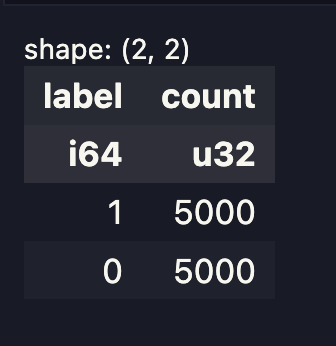

Lets take a look at two texts in our *corpus*. It's always a good idea to get an idea of what's in it!

In [4]:
def print_samples(df_subsampled):
    sample_0 = df_subsampled.filter(pl.col("label") == 0).sample(n=1)
    sample_1 = df_subsampled.filter(pl.col("label") == 1).sample(n=1)

    print("--- Sample with label 0 ---")
    print(sample_0["self_text"].to_list()[0])
    print("\n--- Sample with label 1 ---")
    print(sample_1["self_text"].to_list()[0])
    
print_samples(df_subsampled)

--- Sample with label 0 ---
So sorry to hear!

--- Sample with label 1 ---
&gt; We should all strive to gain that knowledge (I'm not advocating for stupidity), but just because someone hasn't gotten that knowledge doesn't invalidate their beliefs.

One would hope that by the time somebody gets elected into the upper echelons of public office, they would've figured that out by then. At that point, they're not children anymore, and we're going to hold them to a higher standard than that. 

I'm personally not one to go around shitting on other peoples' faith, because I don't think that leads to anywhere productive in the vast majority of cases.  But if you're a politician who's going to put that front and center as to why you're doing what you're doing, you can't then turn around and Pikachu face when people start criticizing said faith.


### 0.5 pts - Train, dev and test sets

Using the `df_subsampled` object, create three sets: training, development/validation, and test. The test set will be used in the evaluation phase, while the first two partitions will be used during the training phase. Remember to keep the test set entirely separate from the training and validation process. Train-dev-test sizes must be $80\%$, $10\%$, and $10\%$ respectively. Feel free to use sklearn library to help you with this task - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [5]:
! pip install -U scikit-learn

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Write your solution here. Store your three sets in three
# different variables called train, validation, test.

text_midstep, test = train_test_split(df_subsampled, test_size = 0.1) #Pull the test data away from the training set, in this case being the midstep for validation
train, validation = train_test_split(text_midstep, test_size = (1/9)) #Pull the validation set out of the training set, using 1/9 to turn the 9000 into 8000 and 1000, and thus 80 10 10

In [8]:
# Let's see the dimensions of our partitions.
# DO NOT CHANGE THIS CODE.

print(train.shape, validation.shape, test.shape)

(8000, 2) (1000, 2) (1000, 2)


## 1. Feature representation

Now, we are ready to implement the first step in our learning pipeline.

Since we need numerical inputs for our learning function, we have to transform our strings to numerical representations. Essentially, we need to find a way to make numbers encode some aspect of word or sentence meaning. There are many ways to do this. In this assignment, we will use the **TF-IDF algorithm** and the **CountVectorizer** method to create two sets of features (both sets will represent the same data). You can learn more about it [here](https://www.learndatasci.com/glossary/tf-idf-term-frequency-inverse-document-frequency/#:~:text=Term%20Frequency%20%2D%20Inverse%20Document%20Frequency%20(TF%2DIDF)%20is,%2C%20relative%20to%20a%20corpus). The method involves multiplying two ratios - the term frequency and the inverse document frequency. 

The term frequency is the number of times a term appears in a document, divided by the total number of terms in the document. The inverse document frequency is the logarithm of the number of documents in the corpus divided by the number of documents that contain the term.

$TF|IDF(t, d, D) = TF(t, d) \times IDF(t, D)$

Where:

$TF(t, d) = \frac{f_{t,d}}{\sum_{t' \in d} f_{t',d}}$

$IDF(t, D) = \log\left(\frac{N}{|\{d \in D : t \in d\}|}\right)$

Where:
- $f_{t,d}$ is the number of times term $t$ appears in document $d$
- $\sum_{t' \in d} f_{t',d}$ is the sum of the number of times each term appears in document $d$, which is basically the total number of terms in the document
- $N$ is the number of documents in the corpus
- $|\{d \in D : t \in d\}|$ is the number of documents in the corpus that contain term $t$


This allows us to get a numerical representation that assigns higher values to the most important words in our *corpus* -- these are not necessarily the most frequent words. (think of the definite article "the". It might appear frequently in a corpus, but it does not provide a lot of semantic content).

### + 1.0 point - Complete the following function and implement the TF-IDF algorithm

Structures from the Piazza Post:

docs: list of lists, list([sentence0_token0, sentence0_token1, ...], [sentence1_token0, sentence1_token1, ...]...)

Output: Dictionary{doc0: Dictionary{word_to_compare_to: score, word_to_compare_to: score, ...} ...}

In [9]:
docs = train["self_text"]
docs = [sentence.split() for sentence in docs]
print(type(docs))
print(docs[:10])

<class 'list'>
[['Fuck', 'the', 'Sex', 'Pistols', '-', 'just', 'a', 'punk', 'boy', 'band', 'put', 'together', 'by', 'Malcolm', 'McClaren.', 'John', 'Lydon', 'was', 'a', 'top', 'tier', 'dick,', 'full', 'of', 'his', 'own', 'importance.', 'Sid', 'Vicious', 'could', 'barely', 'play', 'the', 'bass', 'guitar,', 'and', 'was', 'there', 'for', 'his', 'looks,', 'much', 'like', 'Mark', 'Owen/Jason', 'Orange', 'in', 'Take', 'That.', 'The', 'Clash', 'were', 'levels', 'above', 'the', 'Sex', 'Pistols.'], ['Exactly.', 'Ultimately', 'it’s', 'because', 'they', 'just', 'want', 'to', 'feel', 'superior', 'to', 'you.', 'It’s', 'a', '“I’m', 'better', 'than', 'you', 'because', 'I’m', 'more', 'of', 'this', 'than', 'you', 'are”', 'complex.'], ['&gt;', 'Downvote', 'me', 'more,', 'bitches.', 'Your', 'stupidity', 'fuels', 'me.', 'Do', 'you', 'talk', 'like', 'that', 'at', 'your', 'job?'], ['Who?'], ['I', 'have', 'yet', 'to', 'see', 'any', 'examples', 'of', 'Harvard', 'students', 'calling', 'for', 'genocide.', 'What

In [10]:
import time
import numpy as np

start = time.time()
unique_words = np.unique(list(set().union(*docs)))
print(unique_words)
end = time.time()

print(f"Time Taken: {(end-start)/60} minutes")

['!' '!!' '!!!' ... '🧐' '🧐✡️' '\U0001fae0']
Time Taken: 0.016248778502146403 minutes


Note: set.union strategy source: https://stackoverflow.com/questions/70270242/find-unique-words-in-a-list-of-lists-in-python

Time difference: 0.8891 minutes versus 0.0189 minutes, likely due to using the set being used and how fast those can be.

In [11]:
start = time.time()
#docs_dict = {docs.index(doc):{word:doc.count(word) for word in doc} for doc in docs}
docs_dict = {}
for i in range(len(docs)):
    doc = docs[i]
    docs_dict[i] = {word:doc.count(word) for word in doc}
print(f"Conversion Time: {(time.time() - start)/60} Minutes")

Conversion Time: 0.014956359068552654 Minutes


Following this answer (https://cs.stackexchange.com/questions/114872/fastest-algorithm-to-find-whether-a-list-contains-a-word) stating that dictionaries and other hash methods have lookup O(1), I went to see the speed of conversion to see if it was worth it. As can be seen above, it is quite worth it when times before doing so bordered on 7 to 8 minutes.

In [12]:
from typing import List, Dict
import numpy as np
from tqdm import tqdm

def compute_tf_idf(docs: List[str]) -> Dict[str, Dict[str, float]]:
    start = time.time() #Start the timer to show time taken
    
    tf_idf = {} #Initialize the tf_idf dictionary
    num_docs = len(docs) #The N term in TFIDF
    unique_words = np.unique(list(set().union(*docs))) #Get the list of unique words by using a set union to quickly flatten the 2d list
    
    docs_dict = {} #Initialize a dictionary to hold the documents
    
    #For each document, make it a dictionary of word counts
    for i in range(len(docs)):
        doc = docs[i] #Get the specified document
        docs_dict[i] = {word:doc.count(word) for word in doc} #Convert it to a dictionary of word:count
    
    #A method to calculate the idf based on a given word, specifically made to be vectorized based on the unique words
    #Input: The specified word
    #Output: The IDF for the specified word
    def idf(word):
        values = docs_dict.values() #Get the actual sentence dictionaries from the documents dictionary
        return np.log(num_docs/np.sum([bool(doc.get(word)) for doc in values])) #Return the idf of the word
    
    vectorize_word = np.vectorize(idf) #Create a vectorized function for the idf function
    idf_score = vectorize_word(unique_words) #Utilize the vectorized function to get the idf score for each word, storing these values in a list
    idf_dictionary = dict(zip(unique_words, idf_score)) #Zip together the words and the scores
    
    #For each sentence, calculate the tf_idf based on the words, sort them by said scores, then store them in the tf_idf dictionary
    for i in range(len(docs)):
        doc = docs_dict[i] #Get a sentence from the documents dictionary
        unique_doc = list(doc.keys()) #Get the list of unique words by getting the keys
        tf_items = {word:((doc[word]/len(unique_doc))*idf_dictionary[word]) for word in unique_doc} #Get the tf_idf score for each word in the sentence
        
        sorted_tf_idf = sorted(tf_items.items(), key = lambda idf: idf[1], reverse=True) #Sort by the scores for better visualization
        tf_idf[i] = dict(sorted_tf_idf) #Make the sorted items a dictionary again and store them in the tf_idf dictionary, in format {index:{word:score...}...}
        
    end = time.time() #End the timer
    print(f"TF_IDF Time: {(end-start)/60} Minutes") #Show how long the function took

    return tf_idf #Return the tf_idf dictionary

In [13]:
tf_idf = compute_tf_idf(docs)
print()
print(tf_idf[1])
print(docs[1])

TF_IDF Time: 1.9664798776308696 Minutes

{'are”': 0.3907476878548684, 'Ultimately': 0.3429819361736462, 'superior': 0.3304740199800905, 'complex.': 0.3207721264446901, '“I’m': 0.3128451022362573, 'Exactly.': 0.3003371860427016, 'than': 0.241793121211917, 'because': 0.22670211163149634, 'you.': 0.2054137801574199, 'feel': 0.18259587295130117, 'better': 0.16770861329299563, 'I’m': 0.16307629816660973, 'It’s': 0.1601692135914303, 'you': 0.1601054219954422, 'it’s': 0.1578526324343461, 'want': 0.12761337616250246, 'more': 0.11401939407869834, 'just': 0.09214010485616002, 'this': 0.08123350311303892, 'they': 0.07957567200201462, 'to': 0.0659321023742313, 'of': 0.04263025979224373, 'a': 0.03851400649710397}
['Exactly.', 'Ultimately', 'it’s', 'because', 'they', 'just', 'want', 'to', 'feel', 'superior', 'to', 'you.', 'It’s', 'a', '“I’m', 'better', 'than', 'you', 'because', 'I’m', 'more', 'of', 'this', 'than', 'you', 'are”', 'complex.']


Issues encountered that limited speedup:

- np.array would not accept docs or docs_dict.values() when it became a dictionary due to the lengths not being the same. If padded, this could happen. This means it could not be vectorized either, as np.vectorize and other numpy methods internally include np.array to turn any lists into numpy arrays under the hood.

- There is a small amount of time loss coming from accessing the docs from within the IDF function. This occurred whether or not it was as an apply function or a proper function. The speedup from vectorizing offset this, however.

- np.log is relatively slow compared to other methods like math.log. Using math.log felt against the spirit of the assignment by utilizing an import that was not given, so it was ignored. Approximations using 1000(pow(x, 1/1000)-1) provided a time save of around 20 seconds, but the imprecise nature also felt against the nature of the assignment.

- More time could be shaved off by removing the sort in the tf section, but having the values sorted seems more important to show off the scores.

- Counterintuitive to typical Python usage, there are some values I opt to return without storing and others I put in a variable. My HPSC class from last semester showed me how sometimes there is some speedup from not storing certain values and just calculating them again, which was proved here with the idf return, for example.

Despite these issues, vectorization brought times down to 7-8 minutes, which was further brought down to 2.3 minutes following dictionary implementations. A version to show off times completely without any speedup methods was not made, but even compared to my original loosely-optimized time of 10.3 minutes, this is a massive improvement.

### + 1.0 point - Second set of features

Lets generate a second set of features. This time, we will use `CountVectorizer`, a sklearn method that generates a matrix of token counts from the input text.

In [14]:
# Use the count vectorizer to convert the text data to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
count_vectorizer = CountVectorizer()

In [15]:
from typing import Tuple

def transform_features(count_vectorizer: CountVectorizer, train: pl.DataFrame, validation: pl.DataFrame, test: pl.DataFrame) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    # Fit the CountVectorizer to the train, validation and test  sets
    
    #Fit and transform the vectorizer by the text from each of the dataframes, converting each to an array so the tensor step will work
    #Fit needed to happen with all of the sets first however, as otherwise the results would not line up
    fit1 = count_vectorizer.fit(train["self_text"]) #Fit the training set
    fit2 = fit1.fit(validation["self_text"]) #Fit the validation set
    fit3 = fit2.fit(test["self_text"])#Fit the testing set
    
    train_features = fit3.transform(train["self_text"]).toarray() #Transform the training set
    validation_features = fit3.transform(validation["self_text"]).toarray() #Transform the validation set
    test_features = fit3.transform(test["self_text"]).toarray() #Transform the testing set
    
    return train_features, validation_features, test_features #Return the transformed features

In [16]:
train_features, validation_features, test_features = transform_features(count_vectorizer, train, validation, test)

In [17]:
print(type(train_features)) #Show the array conversion worked, and thus the next step should not throw a fit

<class 'numpy.ndarray'>


In [18]:
print(validation_features[0])

[0 0 0 ... 0 0 0]


In [19]:
# Convert the features to PyTorch tensors.
# Tensors are a useful data structure in machine learning. 
# Their usefulness stems from the fact that they are "n-dimensional vectors" --this allows us
# to conveniently store the features generated from text corpora.
import torch

def convert_to_tensors(train_features: np.ndarray, validation_features: np.ndarray, test_features: np.ndarray) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    # Convert the features to PyTorch tensors
    train_features_tensor = torch.tensor(train_features) #Convert the training features to a tensor
    validation_features_tensor = torch.tensor(validation_features) #Convert the validation features to a tensor
    test_features_tensor = torch.tensor(test_features) #Convert the testing features to a tensor
    
    return train_features_tensor, validation_features_tensor, test_features_tensor #Return the tensors

In [20]:
train_features_tensor, validation_features_tensor, test_features_tensor = convert_to_tensors(train_features, validation_features, test_features) 

In [21]:
# Convert the labels to PyTorch tensors

def convert_labels_to_tensors(train: pl.DataFrame, validation: pl.DataFrame, test: pl.DataFrame) -> Tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
    # Convert the labels to PyTorch tensors
    train_labels = torch.tensor(train["label"]) #Convert the training labels to a tensor
    validation_labels = torch.tensor(validation["label"]) #Convert the validation labels to a tensor
    test_labels = torch.tensor(test["label"]) #Convert the testing labels to a tensor
    
    return train_labels, validation_labels, test_labels #Return the tensor labels

In [22]:
train_labels, validation_labels, test_labels = convert_labels_to_tensors(train, validation, test)

In [23]:
# This will give us an idea of the dimensions of our generated features.
print(train_features_tensor.shape, validation_features_tensor.shape, test_features_tensor.shape)

torch.Size([8000, 5939]) torch.Size([1000, 5939]) torch.Size([1000, 5939])


## 2. The objective function - cross-entropy loss

To optimize the learning process in our classifier, we need to implement a **loss function** or objective function. This function assigns weights to the outputs made by the classifier given how likely they are to be in a class than in another.

For a string $x$, we want to learn weights that maximize the probability of the correct label, $p(y \mid x)$. Since there are only two discrete outcomes ($1$ or $0$), we can make use of the **Bernoulli distribution**, and we can express the probability, $p(y \mid x)$, that our classifier produces for one observation as the following:
$$
p(y \mid x)=\hat{y}^y(1-\hat{y})^{1-y} \quad \text{where} \quad \hat{y}:\text{predicted label}, \quad y:\text{correct label}
$$


Next, we take the log of both sides. This will turn out to be handy mathematically, and doesn't hurt us; whatever values maximize a probability will also maximize the $\log$ of the probability:
$$
\begin{aligned}
\log p(y \mid x) & =\log \left[\hat{y}^y(1-\hat{y})^{1-y}\right] \\
& =y \log \hat{y}+(1-y) \log (1-\hat{y})
\end{aligned}
$$

To turn this into a loss function (something that we need to minimize), we'll just flip the sign on the equation. The result is the cross-entropy loss $L_{\mathrm{CE}}$:
$$
\begin{aligned}
L_{\mathrm{CE}}(\hat{y}, y) & = -\log p(y \mid x) \\
& =-[y \log \hat{y}+(1-y) \log (1-\hat{y})]
\end{aligned}
$$

Finally, we substitute the loss function in  $\hat{y}=\sigma(\mathbf{w} \cdot \mathbf{x}+b)$ to obtain:
$$
L_{\mathrm{CE}}(\hat{y}, y)=-[y \log \sigma(\mathbf{w} \cdot \mathbf{x}+b)+(1-y) \log (1-\sigma(\mathbf{w} \cdot \mathbf{x}+b))]
$$

**For a given input, $x$, want the loss to be smaller if the model's estimate is close to correct, and bigger if the model is confused.**

The equation above is generalized to:
$$
L=-\frac{1}{m} \sum_{i=1}^m y_i \cdot \log \left(\hat{y}_i\right)+\left(1-y_i\right) \cdot \log \left(1-\hat{y}_i\right)\quad \text{where} \quad m:\text{no. of samples in the corpus}
$$

### + 1.0 point - Cross-entropy loss implementation

Complete the following function and implement the cross-entropy loss function.

In [24]:
# Step 2: Cross-Entropy Loss
def cross_entropy_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    num_samples = len(y_true) #Get the number of samples for cross-entropy loss
    
    #loss_math: calculates the summation portion of the cross-entropy loss
    #Input: y_true and y_pred applied via the vectorization function
    #Output: the summation values
    def loss_math(y_t, y_p):
        return (y_t*np.log(y_p)) + ((1-y_t)*np.log(1-y_p)) #Return the calculated value for the y_true and y_pred variables
    
    math_vector = np.vectorize(loss_math) #Vectorize the summation portion of the math to better leverage numpy
    loss = math_vector(y_true, y_pred) #Send the values to the vectorized loss function
    
    return (-1/num_samples)*sum(loss) #Return the loss after combining the summation section with the rest


## 3. The sigmoid function

$$ \begin{align}
\quad \sigma(z)=\frac{1}{1+e^{-z}}=\frac{1}{1+\exp (-z)}
\end{align}
$$ 

- This function is also called the **logistic function**. It takes a real-valued number and maps it into the range $(0,1)$, which is what we want because we want to model probabilities. 
- The sigmoid function takes real-valued numbers as inputs  --this is why we needed to create the features beforehand.
- Because it is nearly linear around $0$ but ﬂattens toward the ends, the sigmoid function tends to squash outlier values toward $0$ or $1$.
- It’s differentiable, which is convenient for the learning process (this process is just a series of function optimizations).
- Given a input $x$, we want to assign it a label. In the case of our *corpus*, we can only make two decisions: controversial or not controversial. 
- The sigmoid function is written in terms of $z$ because it takes a **random variable**.

### + 1.0 point - Sigmoid function implementation

Complete the following function and implement the sigmoid function.

In [25]:
from typing import Union

def sigmoid(x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
    return 1/(1+np.exp(-x)) #Return the sigmoid of the given value

## 4. Gradient descent

This algorithm will help us **optimize** our loss function. Since our loss function is differentiable, we can optimize it by calculating the derivatives. 

We now introduce **weights** into our predictions --these should minimize the loss function averaged over all examples:

$$
L=-\frac{1}{m} \sum_{i=1}^m y_i \cdot \log \left(\sigma\left(\mathrm{X}_{\mathrm{i}} w+b\right)\right)+\left(1-y_i\right) \cdot \log \left(1-\sigma\left(\mathrm{X}_{\mathrm{i}} w+b\right)\right)
$$

By taking the gradient $L$ with respect to $w$, you get the following:
$$
\frac{\partial L}{\partial w}=\frac{1}{m}\left(\sigma\left(\mathrm{X} w+b\right)-y\right) X
$$

By taking the gradient $L$ with respect to $b$, you get the following:
$$
\frac{\partial L}{\partial b}=\frac{1}{m} \sum_{i=1}^m \sigma\left(\mathrm{X}_{\mathrm{i}} w+b\right)-y_i
$$

[source](https://www.tensorflow.org/guide/core/logistic_regression_core)

Stochastic gradient descent is an algorithm that minimizes the loss function by computing its gradient after each training example, and nudging $\theta$ in the right direction (the opposite direction of the gradient). 

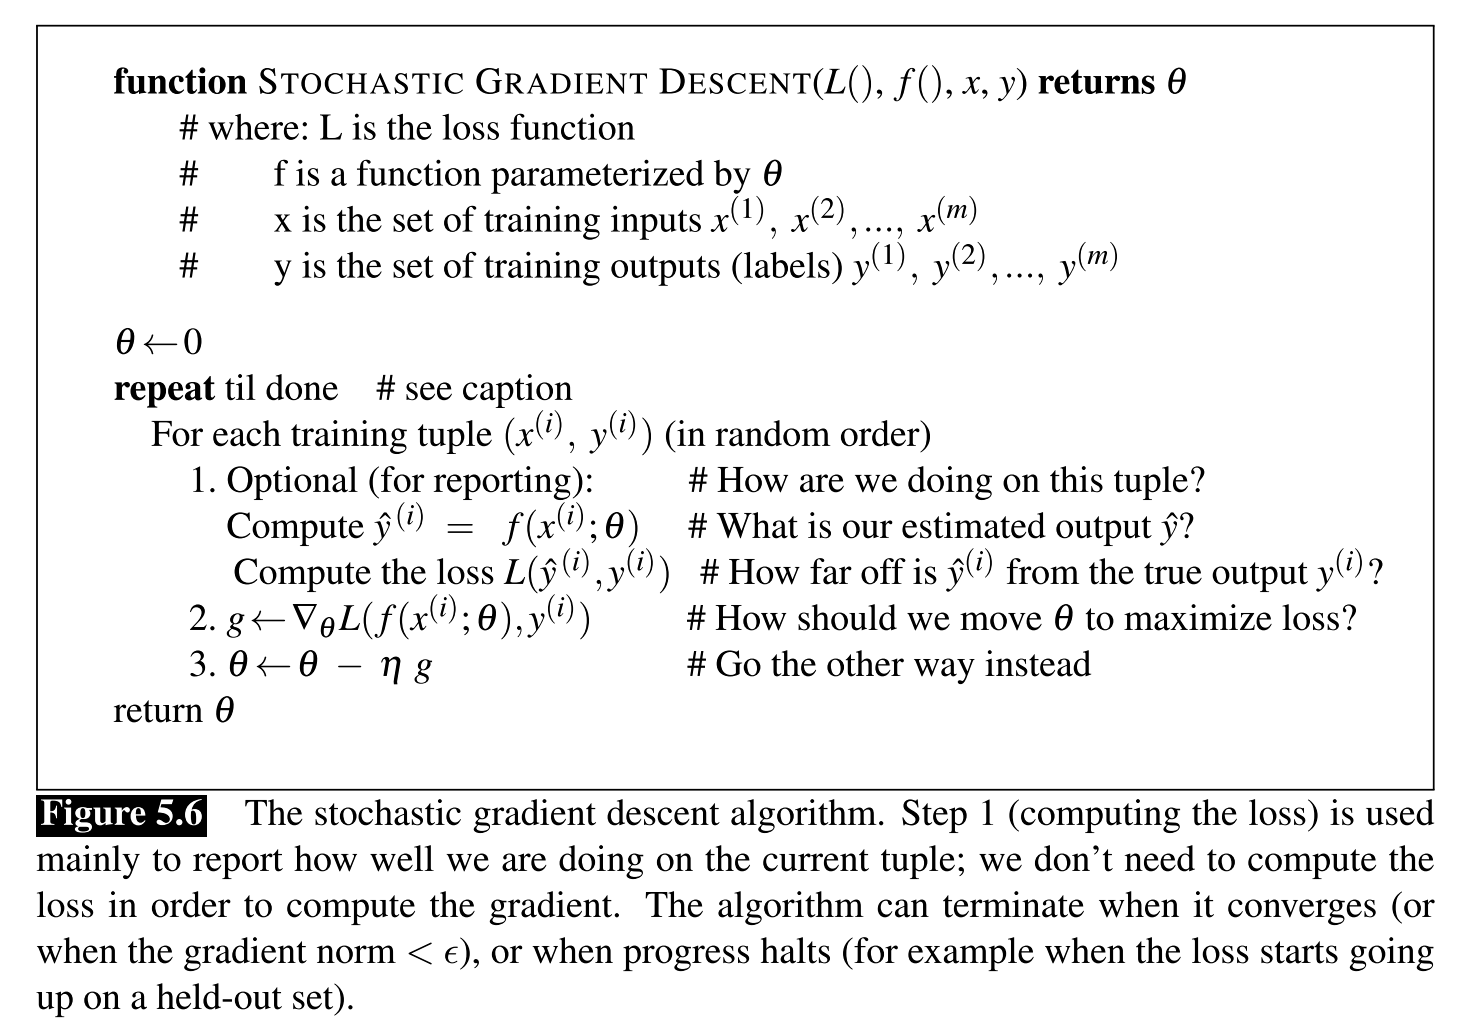
[source](https://web.stanford.edu/~jurafsky/slp3/5.pdf)


The learning rate $\eta$ is a hyperparameter --this means that it is a value that we have to choose manually and arbitrarily, and adjust later on depending on the optimization results. If it is set too low, the algorithm will take very long to find a minimum.

## 5. Training

Now that we have created all the necessary building blocks for our logistic regression model, we will perform the **training phase**, in which we will **learn** the weights for particular *corpus*.

### + 1.0 point - Complete the following function:

In [26]:
from typing import Tuple

# hyperparameters: 
# lr: learning rate
# epochs: number of passes through the entire corpus.
def logistic_regression(X: np.ndarray, y: np.ndarray, lr: float = 0.1, epochs: int = 100) -> Tuple[np.ndarray, float]:
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    for epoch in tqdm(range(epochs)):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z) #Take the sigmoid to get the predictions
        loss = cross_entropy_loss(y, y_pred) #Calculate the loss utilizing the function written previously
        
        #print(list(zip(y, y_pred)))
        
        # Gradient computation
        dw = np.dot(X.T, (y_pred - y)) / m
        db = np.sum(y_pred - y) / m
        
        # Update weights
        w -= lr * dw
        b -= lr * db
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return w, b

In [27]:
y = np.array(train_labels)
w, b = logistic_regression(train_features_tensor, y, 0.1, 100)

  1%|          | 1/100 [00:00<00:37,  2.66it/s]

Epoch 0, Loss: 0.6931471805600389


 11%|█         | 11/100 [00:04<00:36,  2.42it/s]

Epoch 10, Loss: 0.6876997159384556


 21%|██        | 21/100 [00:08<00:30,  2.55it/s]

Epoch 20, Loss: 0.684491851849383


 31%|███       | 31/100 [00:12<00:32,  2.15it/s]

Epoch 30, Loss: 0.6818693972078597


 41%|████      | 41/100 [00:16<00:22,  2.65it/s]

Epoch 40, Loss: 0.6796176299742341


 51%|█████     | 51/100 [00:20<00:18,  2.63it/s]

Epoch 50, Loss: 0.6776283069642889


 61%|██████    | 61/100 [00:24<00:14,  2.64it/s]

Epoch 60, Loss: 0.6758370765607863


 71%|███████   | 71/100 [00:28<00:12,  2.25it/s]

Epoch 70, Loss: 0.6742011665199938


 81%|████████  | 81/100 [00:32<00:07,  2.61it/s]

Epoch 80, Loss: 0.6726902764052771


 91%|█████████ | 91/100 [00:36<00:03,  2.63it/s]

Epoch 90, Loss: 0.6712820993441598


100%|██████████| 100/100 [00:39<00:00,  2.50it/s]


### 0.5 points - Predict the final probabilities

Now, we will create a function that will output the final probabilities of our model. The inputs will be the `trained_model` and the `features` of the test dataset. 

Fill in the missing code and consider a boundary of $>=0.5$

In [28]:
def predict(X: np.ndarray, w: np.ndarray, b: float) -> np.ndarray:
    
    return (sigmoid(np.dot(X,w) + b) >= 0.5).astype(int)

In [29]:
predictions = predict(test_features_tensor, w, b)
print("Predictions:", predictions)

Predictions: [1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0
 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1
 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0
 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0
 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1
 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0
 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1
 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 1 1 1 0 1 1

## 6. Evaluation metrics

A very important step in every ML pipeline is the evaluation since we always want to know how well/bad our model will predict the labels of unseen examples.

In NLP we make use of various evaluation metrics for our models. The most common ones are:

- Accuracy: It is the ratio of the number of correct predictions divided by the number of total predictions. This gives us an idea of how many correct outputs our model will generate when prediciting labels on unseen examples. The formula is: 
$$
\begin{aligned}
Accuracy = \frac{numberOfCorrectPredictions}{total Number Of Predictions}
\end{aligned}
$$
- Precision: This metric indicates the ratio of true positive predictions divided by the total number of positive predictions. It indicates us the quality of our model, since it gives us a notion of how many of the predictions in one class actually belong to that class.
$$
\begin{aligned}
Precision = \frac{truePositives}{truePositives + falsePositives}
\end{aligned}
$$
- Recall: It calculates the proportion of true positive predictions divided by the total number of actual positive items (i.e.,  the sum of true positive and false negative predictions). Intuitively, it tells us how many of the actual positive instances of a class the model correctly identified.
$$
\begin{aligned}
Recall = \frac{truePositives}{truePositives + false Negatives}
\end{aligned}
$$
- F1 metric: This metric is the result of dividing precision and recall in an equally weighted manner. It is used to see how balanced are the precision and recall metrics, and when there is an uneven class distribution. In our case, we do not have an unbalanced proportion of labels. What do you expect then to see here for our corpus?
$$
\begin{aligned}
F1 = 2 * \frac{Precision*Recall}{Precision+Recall}
\end{aligned}
$$

### + 1.0 pts Evaluation metrics implementation

Complete the following functions that generate the evaluation metrics introduced before:

In [30]:
#Helper functions to get correct, true positive, false positive, and false negative values so all of the others have access
#Inputs for each of these functions: The true labels, the predicted labels

#Output: The correct predictions
def correct(y_t, y_p):
        return y_t == y_p

#Output: True positives (where the predicted and true labels are both positive)
def true_positives(y_t, y_p):
    return y_t == 1 and y_p == 1

#Output: False positives (where the predicted value comes out positive while the true value was actually negative)
def false_positives(y_t, y_p):
    return y_t == 0 and y_p == 1

#Output: False negatives (where the predicted value comes out negative while the true value was actually positive)
def false_negatives(y_t, y_p):
    return y_t == 1 and y_p == 0


def accuracy(y_true: List[int], y_pred: List[int]) -> float:
    # Compute accuracy of the model based on the true and predicted labels
    predictions = len(y_true) #Calculate the number of predictions
    
    vector_correct = np.vectorize(correct) #Vectorize the correct function to get the number of correct values for accuracy
    num_correct = vector_correct(y_true, y_pred) #Utilize the vectorized function on the labels to get the number of correct answers
        
    return sum(num_correct)/predictions #Finish calculating the accuracy by summing the correct answers together and dividing that by the total

def precision(y_true: List[int], y_pred: List[int]) -> float:
    # Compute precision of the model based on the true and predicted labels
    predictions = len(y_true) #Calculate the number of predictions
    
    #Vectorize the true and false positive functions to calculate the precision
    vector_tp = np.vectorize(true_positives)
    vector_fp = np.vectorize(false_positives)
    
    true_positive = vector_tp(y_true, y_pred) #Get the true positives from the true positives function
    false_positive = vector_fp(y_true, y_pred) #Get the false positives from the false positives functions
        
    return sum(true_positive)/(sum(true_positive) + sum(false_positive)) #Return the precision truepos/(truepos + falsepos)

def recall(y_true: List[int], y_pred: List[int]) -> float:
    # Compute recall of the model based on the true and predicted labels
    predictions = len(y_true) #Calculate the number of predictions
    
    #Vectorize the true positive and false negative functions to calculate the recall
    vector_tp = np.vectorize(true_positives)
    vector_fn = np.vectorize(false_negatives)
    
    true_positive = vector_tp(y_true, y_pred) #Get the true positives from the true positives function
    false_negative = vector_fn(y_true, y_pred) #Get the false negatives from the false negatives function
        
    return sum(true_positive)/(sum(true_positive) + sum(false_negative)) #Return the recall truepos/(truepos + falseneg)

def f1_score(y_true: List[int], y_pred: List[int]) -> float:
    # Compute F1 score of the model based on the true and predicted labels
    recall_score = recall(y_true, y_pred) #Calculate the recall by calling the recall function
    precision_score = precision(y_true, y_pred) #Calculate the precision by calling the precision function

    return 2*((precision_score*recall_score)/(precision_score + recall_score)) #Calculate the F1 score 2*((precision*recall)/(precision+recall))

## 7. Evaluation

Now, we will evaluate the performance of our classifier. During this step we will make use of the test set that we created in the beginning; we will use the test set during this phase because we want to simulate a real-world scenario. That is, if we train a model and we deploy it in a real-world application, we expect that the users will pass new (unseen) text samples to that train model. In our case, those new samples are in the test set. By "hidding" the test set during the training phase, we make sure that our models will have some generalization capabilities when dealing with unseen data.

### + 0.5 pts - Evaluation

Complete the following lines of code and print the classification metrics the trained model achieves.

In [33]:
### DO NOT EDIT ###
### Test set results
print('Logistic regression with CountVectorizer features - Results:')
print('Accuracy:', accuracy(test_labels, predictions))
print('Precision:', precision(test_labels, predictions))
print('Recall:', recall(test_labels, predictions))
print('F1-score', f1_score(test_labels, predictions))

Logistic regression with CountVectorizer features - Results:
Accuracy: 0.586
Precision: 0.5938242280285035
Recall: 0.5070993914807302
F1-score 0.5470459518599562


## 8. Regularization

Even though we want our machine learning models to learn as best as possible from our data, we don't want them to approximate precise functions for all the inputs. Why? Because when we show them new samples, they won't be able to predict its label accurately given that they will only be optimized for a set of specific training samples. Therefore, we want our models to have some room for error.

To avoid overfitting, a new regularization term, $R(\theta)$, is added to the objective function, resulting in the following objective for a batch of $m$ examples (slightly rewritten to be maximizing log probability rather than minimizing loss, and removing the $\frac{1}{m}$ term which doesn't affect the argmax):
$$
\hat{\theta}=\underset{\theta}{\operatorname{argmax}} \sum_{i=1}^m \log P\left(y^{(i)} \mid x^{(i)}\right)-\alpha R(\theta)
$$

The new regularization term, $R(\theta)$, is used to penalize large weights. Thus a setting of the weights that matches the training data perfectly— but uses many weights with high values to do so-will be penalized more than a setting that matches the data a little less well, but does so using smaller weights. There are two common ways to compute this regularization term $R(\theta)$. L2 regularization is a quadratic function of the weight values, named because it uses the (square of the) L2 norm of the weight values. The L2 norm, $\|\theta\|_2$, is the same as the Euclidean distance of the vector $\theta$ from the origin. If $\theta$ consists of $n$ weights, then:
$$
R(\theta)=\|\theta\|_2^2=\sum_{j=1}^n \theta_j^2
$$

The L2 regularized objective function becomes:
$$
\hat{\theta}=\underset{\theta}{\operatorname{argmax}}\left[\sum_{i=1}^m \log P\left(y^{(i)} \mid x^{(i)}\right)\right]-\alpha \sum_{j=1}^n \theta_j^2
$$

L1 regularization is a linear function of the weight values, named after the $\mathrm{L} 1$ norm $\|W\|_1$, the sum of the absolute values of the weights, or Manhattan distance (the Manhattan distance is the distance you'd have to walk between two points in a city with a street grid like New York):
$$
R(\theta)=\|\theta\|_1=\sum_{i=1}^n\left|\theta_i\right|
$$

The L1 regularized objective function becomes:
$$
\hat{\theta}=\underset{\theta}{\operatorname{argmax}}\left[\sum_{1=i}^m \log P\left(y^{(i)} \mid x^{(i)}\right)\right]-\alpha \sum_{j=1}^n\left|\theta_j\right|
$$

### 1.0 pts - Implement and test the L1 regularization

Using the code provided next, train another LR classifier. The difference in this new LR model will be that now we will use the L1 regularization. 

Evaluate this new LR model and compare the results obtained by this model and the previous one.

Utilized this source explaining L1: https://towardsdatascience.com/intuitions-on-l1-and-l2-regularisation-235f2db4c261

I felt this was fine to use due to the difference in loss function. I really just needed something that put the values in similar terms. I do not know why, but whenever the w representing weights becomes $\theta$, my brain cannot handle it.

In [34]:
def logistic_regression_l1(X: np.ndarray, y: np.ndarray, lr: float = 0.1, epochs: int = 100, lambda_: float = 0.1) -> Tuple[np.ndarray, float]:
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    
    for epoch in tqdm(range(epochs)):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
        
        #Takes the argmax of the log likelihood then subtracts lambda * the absolute value of the weights. This could be multiple lines, but the one liner fit the original set better
        loss = np.argmax(map(lambda y_t, y_p: (y_t*np.log(y_p)) + ((1-y_t)*np.log(1-y_p)), y, y_pred)) - (lambda_ * sum(abs(w)))
        
        # Gradient computation
        weight = np.dot(X.T, (y_pred - y)) / m #Calculates the normal weight change
        
        #Adds or subtracts the lambda to the weight change based on the sign of the weight, calculated by weight/abs(weight).
        #A very small value is added to the top and bottom for the case where weight is 0, so it becomes small/small = 1 instead of 0/0 = error
        dw = weight + ((weight+0.00000000000001)/abs(weight+0.00000000000001))*lambda_
        db = np.sum(y_pred - y) / m
        
        # Update weights
        w -= lr * dw
        b -= lr * db
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return w, b

In [35]:
y = np.array(train_labels) #Get the training labels
w, b = logistic_regression_l1(train_features_tensor, y, 0.1, 100, 0.1) #Train the model

#Note: the loss does not need to be positive. This specific math will always pull the loss negative.

  1%|          | 1/100 [00:00<00:31,  3.15it/s]

Epoch 0, Loss: 0.0


 11%|█         | 11/100 [00:04<00:34,  2.59it/s]

Epoch 10, Loss: -36.401087913558044


 21%|██        | 21/100 [00:08<00:32,  2.45it/s]

Epoch 20, Loss: -70.0564217417981


 31%|███       | 31/100 [00:11<00:24,  2.82it/s]

Epoch 30, Loss: -104.03756941505915


 41%|████      | 41/100 [00:15<00:21,  2.80it/s]

Epoch 40, Loss: -137.62422392094558


 51%|█████     | 51/100 [00:18<00:16,  2.94it/s]

Epoch 50, Loss: -170.3059343595155


 61%|██████    | 61/100 [00:22<00:12,  3.01it/s]

Epoch 60, Loss: -202.46705808034426


 71%|███████   | 71/100 [00:26<00:12,  2.40it/s]

Epoch 70, Loss: -234.49130659127798


 81%|████████  | 81/100 [00:29<00:06,  2.97it/s]

Epoch 80, Loss: -265.96318226433385


 91%|█████████ | 91/100 [00:33<00:03,  2.95it/s]

Epoch 90, Loss: -297.03101669510653


100%|██████████| 100/100 [00:36<00:00,  2.77it/s]


In [36]:
predictions = predict(test_features_tensor,w,b) #Get the predictions based on the L1 values

### DO NOT EDIT ###
### Test set results
print('L1 Logistic regression with CountVectorizer features - Results:')
print('Accuracy:', accuracy(test_labels, predictions))
print('Precision:', precision(test_labels, predictions))
print('Recall:', recall(test_labels, predictions))
print('F1-score', f1_score(test_labels, predictions))

L1 Logistic regression with CountVectorizer features - Results:
Accuracy: 0.555
Precision: 0.5774193548387097
Recall: 0.3630831643002028
F1-score 0.44582814445828145


### + 1.0 point - Comparison with another set of features

Using the TF-IDF features we created in the beginning, train a third LR model and compare its performance to the other two. 

What can you say about these results? Write a brief paragraph where you explain your findings.

This is where the unpadded docs issue comes to a head. The logistic regression utilizes numpy arrays, and neither the original dictionary nor the values in new lists work with np.array. The dictionary just does not connect, and taking the values as a list runs into the issue of them not being the same length again. As such, padding had to be added to actually use the tf_idf values. It was added externally here rather than in the function due to the spirit of the assignment at that point.

In [37]:
y = np.array(train_labels) #Get the training labels
training_tf_idf = [] #Initialize a list to convert the dictionary to a list of lists

#For each doc, get the list portion and convert their tf_idf scores into a list
for i in list(tf_idf.keys()):
    actual_dict = tf_idf[i] #Get the specified document
    training_tf_idf.append(list(actual_dict.values())) #Add a list of their values to the training list
    
max_len = len(max(training_tf_idf, key = len)) #Get the length of the longest sentence

#For each document, append 0's until they are all padded to the length of the longest sentence
for i in range(len(training_tf_idf)):
    doc = training_tf_idf[i] #Get the specified document
    
    #While the document is not at the max length, add padding
    while len(doc) < max_len:
        doc.append(0) #Append a padding 0
    training_tf_idf[i] = doc #Replace that document in the list with the padded version
    
    
print(training_tf_idf[0]) #Show off the padding

[0.3093562561566221, 0.17621954550317595, 0.17621954550317595, 0.17621954550317595, 0.17621954550317595, 0.17621954550317595, 0.17621954550317595, 0.17621954550317595, 0.17621954550317595, 0.17621954550317595, 0.17621954550317595, 0.17621954550317595, 0.17621954550317595, 0.17621954550317595, 0.16262842431572602, 0.15467812807831105, 0.14903730312827612, 0.14903730312827612, 0.1446619393770171, 0.13544618194082622, 0.12920199113458045, 0.12920199113458045, 0.12749588570341122, 0.12312052195215221, 0.11848544787246143, 0.11848544787246143, 0.11561086994713053, 0.11159529322858125, 0.11088220216640723, 0.10247052362683157, 0.10031364332851142, 0.09667074598007139, 0.0915629158259934, 0.08047833133481573, 0.08034950339784365, 0.07407275819255985, 0.07313140095361159, 0.065455344754917, 0.06399238664136456, 0.060110164725846224, 0.05893691390995083, 0.048335372990035694, 0.04316880736576556, 0.041717292490348445, 0.0415533806214055, 0.03473812350719182, 0.034356975619629894, 0.027409039166

In [38]:
w, b = logistic_regression(np.array(training_tf_idf), y) #Train the logistic regression on the tf_idf scores

  3%|▎         | 3/100 [00:00<00:04, 21.88it/s]

Epoch 0, Loss: 0.6931471805600389


 16%|█▌        | 16/100 [00:00<00:03, 26.20it/s]

Epoch 10, Loss: 0.6912490390701327


 23%|██▎       | 23/100 [00:00<00:02, 26.26it/s]

Epoch 20, Loss: 0.6904027443714204


 37%|███▋      | 37/100 [00:01<00:02, 29.07it/s]

Epoch 30, Loss: 0.6898224620388645


 44%|████▍     | 44/100 [00:01<00:02, 27.97it/s]

Epoch 40, Loss: 0.6893570848196422


 55%|█████▌    | 55/100 [00:02<00:01, 29.72it/s]

Epoch 50, Loss: 0.6889653681129614


 67%|██████▋   | 67/100 [00:02<00:01, 30.82it/s]

Epoch 60, Loss: 0.6886289538536847


 75%|███████▌  | 75/100 [00:02<00:00, 30.42it/s]

Epoch 70, Loss: 0.6883365019852563


 87%|████████▋ | 87/100 [00:03<00:00, 29.74it/s]

Epoch 80, Loss: 0.6880799959801515


 95%|█████████▌| 95/100 [00:03<00:00, 30.81it/s]

Epoch 90, Loss: 0.68785343962218


100%|██████████| 100/100 [00:03<00:00, 28.64it/s]


In [39]:
docs = test["self_text"] #Get the test strings
docs = [sentence.split() for sentence in docs] #Split them up to the expected input of compute_tf_idf
test_idf = compute_tf_idf(docs) #Compute the tf_idf scores for the test set

test_tf_idf = [] #Initialize a testing list for conversion

#For each item, get their scores as a list and put it in the testing list
for i in list(test_idf.keys()):
    actual_dict = test_idf[i] #Pull out the dictionary of score
    test_tf_idf.append(list(actual_dict.values())) #Insert the list of scores into the testing list
    
#Note: Max length used is the same as the training set. It needs to be done this way as that is also the length of the weight list

#For each score list, pad it to the max length
for i in range(len(test_tf_idf)):
    doc = test_tf_idf[i] #Pull out a document
    
    #While the sentence is not at max length, add a padding 0
    while len(doc) < max_len:
        doc.append(0) #Add a 0 as padding
    test_tf_idf[i] = doc #Reinsert the now padded document

predictions = predict(test_tf_idf,w,b) #Pull predictions based on the tf_idf regression

### DO NOT EDIT ###
### Test set results
print('Logistic regression with tf_idf features - Results:')
print('Accuracy:', accuracy(test_labels, predictions))
print('Precision:', precision(test_labels, predictions))
print('Recall:', recall(test_labels, predictions))
print('F1-score', f1_score(test_labels, predictions))

TF_IDF Time: 0.06047252813975016 Minutes
Logistic regression with tf_idf features - Results:
Accuracy: 0.537
Precision: 0.525
Recall: 0.6389452332657201
F1-score 0.576395242451967


*Write here a few lines explaining your observations from these new results (for example, are the classification metrics higher or lower than the ones previously obtained? Why do you think this happens? Which ones were easier to implement? Which set of features seems more intuitive to you? etc)*

The tensor versions were much easier to implement, but of course those are built off the backs of giants (tensors, CountVectorizer, and related items were built and optimized by big companies for ease of use). They make the meaning harder to understand compared to the version coded by me here, however. 

The non-L1 tensor version of the logistic regression had the greatest accuracy, the most well-rounded values, and the most intuitive loss, but the lack of word cleaning in the assignment kept its values lower than would be preferred. The tf_idf version may not have had the same accuracy and precision, it had a much better recall. This indicated that the tf_idf was much better in identifying positive entries. The similar F1 scores, however, shows they are each as good as one another, only with better identification of positive or negative entries respectively for the tf_idf and tensor models.

Also, it is nice to see that the tf_idf time for the testing set is only a couple seconds. It really shows all the effort for speedup in that area meant something.

### + extra:  1.0 point - LR in sklearn

Implement a fourth LR model using the sklearn [implementation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Use the same hyperparameters that you used in the previous trained models. Finally, compare your results with those obtained by the sklearn implementation. 

In [40]:
from sklearn.linear_model import LogisticRegression #Import scikit-learn's Logistic Regression

skRegression = LogisticRegression(penalty = None, max_iter = 100) #Initialize the regression
skRegression.fit(train_features_tensor, y) #Fit the regression on the data, using no penalty (like the base model above) and 100 epochs

C:\Users\lunam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [41]:
predictions = skRegression.predict(test_features_tensor) #Predict based on the scikit-learn implementation

In [42]:
### DO NOT EDIT ###
### Test set results
print('Logistic regression from scikit-learn with tensors - Results:')
print('Accuracy:', accuracy(test_labels, predictions))
print('Precision:', precision(test_labels, predictions))
print('Recall:', recall(test_labels, predictions))
print('F1-score', f1_score(test_labels, predictions))

Logistic regression from scikit-learn with tensors - Results:
Accuracy: 0.555
Precision: 0.548
Recall: 0.5557809330628803
F1-score 0.5518630412890232


The scikit-learn implementation provided very level results. Precision and recall remained around the same compared to the other models, which had one or the other higher than the other. The original model also had higher accuracy, but that does not mean as much with such low values.